In [202]:
#Nerflix Movies and TV Shows Data Analysis

In [208]:
#This project analyzes the Netflix dataset to explore content trends,generes,countries,and viewer preferences.It includes data cleaning,feature extraction,and answering key analytical questions


In [58]:
import pandas as pd

In [60]:
df=pd.read_csv("netflix_titles.csv")


In [62]:
df.head(5) #printing top 5 values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [64]:
print("Dataseet shape:",df.shape)    #getting the no. of rows and cols and the information
df.info()

Dataseet shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [66]:
df.isnull() # to check how many missing values 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
df.isnull().sum() #to show number of missing values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [78]:
#fill missing values with "Unknown"
df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna('Unknown')
df['rating']=df['rating'].fillna('Unknown')
df['duration']=df['duration'].fillna('Unknown')


In [120]:
df['country']=df_original['country']

In [122]:
#drop rows where date added is missing
df.dropna(subset=['date_added'],inplace=True)


In [124]:
#remove any leading/trailing spaces
df['date_added']=df['date_added'].astype(str).str.strip()


In [126]:
#convert date added to date time format
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')


In [128]:
#extract year into new column
df['year_added']=df['date_added'].dt.year

In [130]:
df[['date_added','year_added']].head()     #to view values

,date_added,year_added
0,2021-09-25,2021
1,2021-09-24,2021
2,2021-09-24,2021
3,2021-09-24,2021
4,2021-09-24,2021


In [132]:
sorted(df['year_added'].dropna().unique())   #to sort the years

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [134]:
yearly_counts=df['year_added'].value_counts().sort_index()    #count how many titles were added each year
yearly_counts

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

In [136]:
df['type'].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

In [150]:
df['country'].value_counts().head(10)

country
United States     2812
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [146]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [142]:
#df_original=pd.read_csv("netflix_titles.csv")

In [148]:
#df_original['country'].dropna().unique()

In [152]:
type_year_counts=df.groupby(['release_year','type']).size().unstack()
type_year_counts.fillna(0,inplace=True)
type_year_counts.head()

type,Movie,TV Show
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,1.0


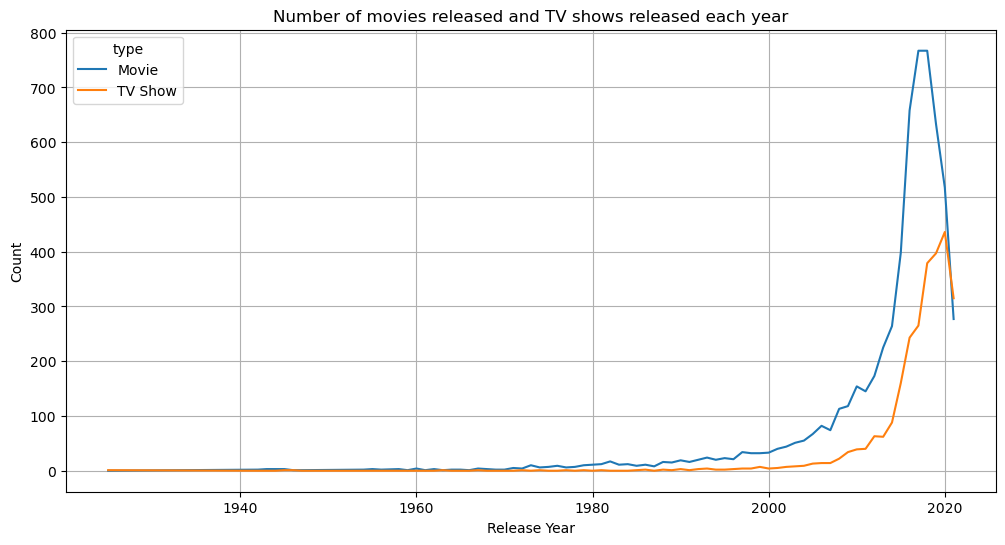

In [158]:
#simple line plot to compare movies v/s tv shows
import matplotlib.pyplot as plt
type_year_counts.plot(kind='line',figsize=(12,6))
plt.title("Number of movies released and TV shows released each year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## 1.How many movies vs TV Shows are on Netflix?

type
Movie      6131
TV Show    2666
Name: count, dtype: int64


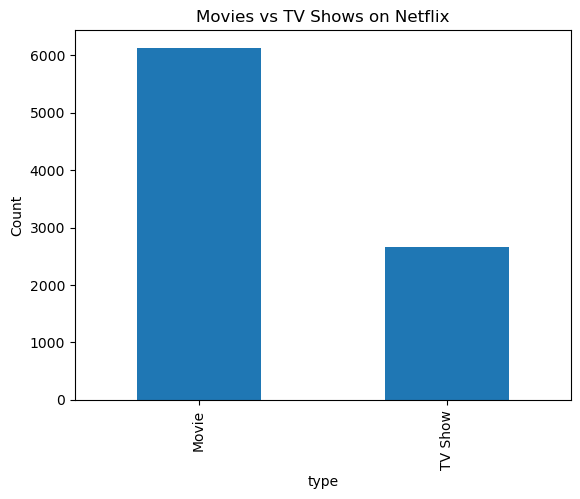

In [167]:
type_counts = df['type'].value_counts()
print(type_counts)
#plot
type_counts.plot(kind='bar',title="Movies vs TV Shows on Netflix")
plt.ylabel("Count")
plt.show()

## 2.Which year saw the most content?

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


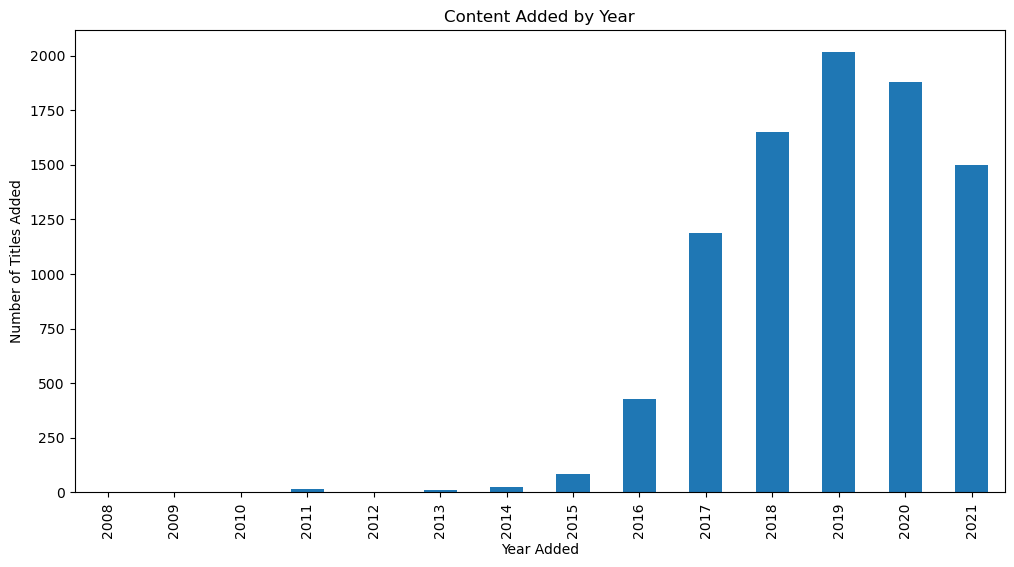

In [174]:
yearly_added_counts=df['year_added'].value_counts().sort_index()    
print(yearly_added_counts)
#plot
yearly_added_counts.plot(kind="bar",figsize=(12,6),title="Content Added by Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.show()
           

## 3.Which countries produce the most Netflix Titles?

country
United States     2812
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


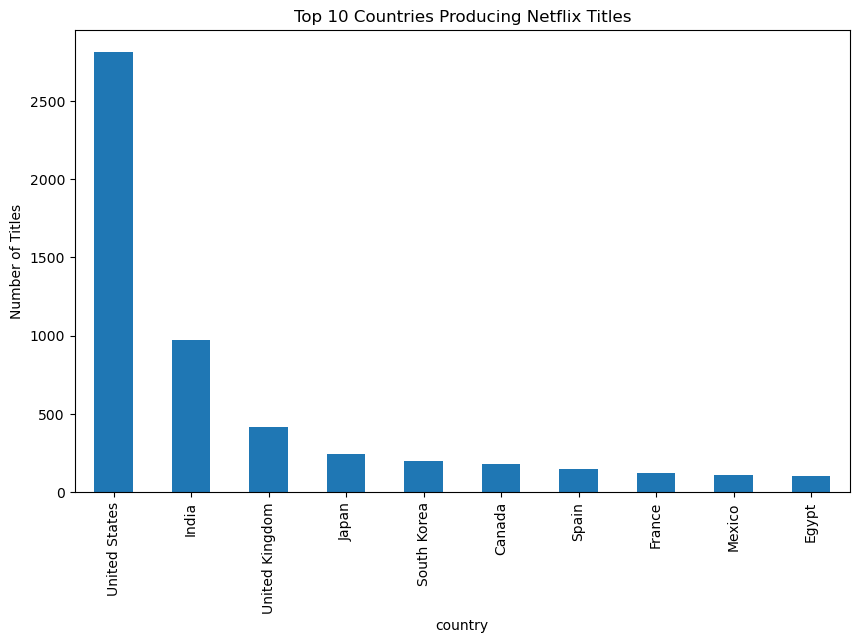

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and is a DataFrame

# Filter out rows where country is 'Unknown'
top_countries = df[df['country'] != 'Unknown']

# Get the top 10 countries by the number of titles
top_countries_counts = top_countries['country'].value_counts().head(10)

# Print the top countries
print(top_countries_counts)

# Plot
top_countries_counts.plot(kind='bar', figsize=(10, 6), title="Top 10 Countries Producing Netflix Titles")
plt.ylabel("Number of Titles")
plt.show()


## 4.What kind of content is popular(generes,etc..)?

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


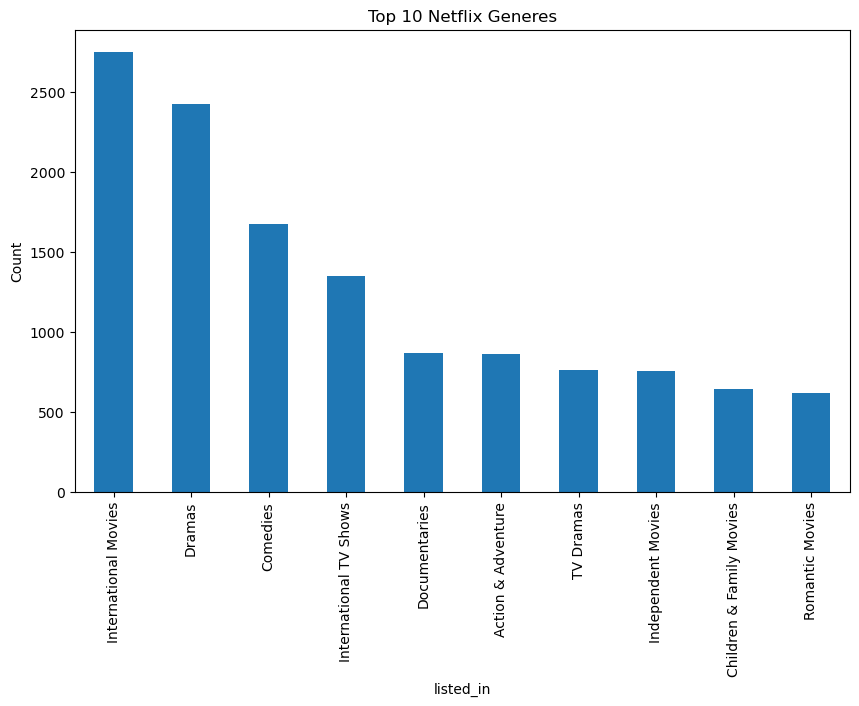

In [188]:
generes=df['listed_in'].str.split(',').explode().str.strip()
top_generes=generes.value_counts().head(10)
print(top_generes)
#plot
top_generes.plot(kind='bar',figsize=(10,6),title="Top 10 Netflix Generes")
plt.ylabel("Count")
plt.show()

## 5.What are common trends in Netflix descriptions?


In [196]:
from collections import Counter
import re
all_descriptions=' '.join(df['description'].dropna()).lower()
words=re.findall(r'\b\w+\b',all_descriptions)
common_words=Counter(words).most_common(50)
print(common_words)

[('a', 11628), ('the', 8175), ('to', 6487), ('and', 6362), ('of', 5299), ('in', 4416), ('his', 3356), ('s', 2612), ('with', 2268), ('her', 2167), ('an', 1993), ('for', 1801), ('on', 1789), ('their', 1669), ('when', 1517), ('this', 1391), ('from', 1292), ('as', 1223), ('is', 1116), ('he', 1066), ('by', 1008), ('after', 994), ('who', 928), ('that', 876), ('life', 843), ('but', 805), ('up', 787), ('at', 749), ('young', 729), ('into', 714), ('new', 709), ('family', 635), ('they', 634), ('she', 587), ('world', 569), ('man', 538), ('two', 505), ('love', 503), ('woman', 486), ('out', 463), ('him', 447), ('friends', 445), ('must', 398), ('series', 395), ('one', 387), ('are', 383), ('while', 376), ('it', 374), ('documentary', 365), ('about', 355)]


C:\Users\yasmi\AppData\Local\Temp\ipykernel_16880\1682958965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='Set2')


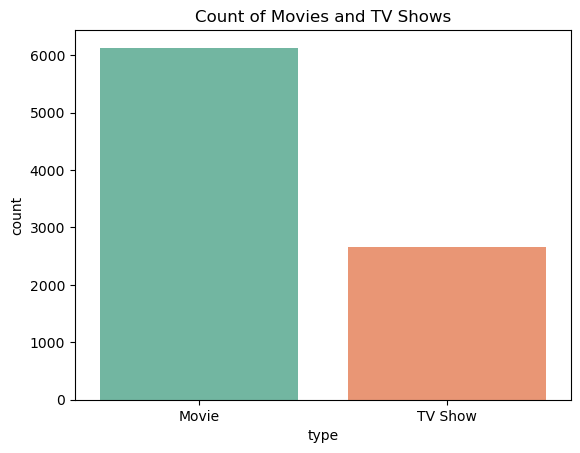

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='type',palette='Set2')
plt.title("Count of Movies and TV Shows")
plt.show()

In [232]:
'''Conclusion
- Netflix has more movies than TV shows.
- Most content was added in 2019 and 2020.
- The United States leads in content production.
- Popular genres include dramas, comedies, and international content.
- Common keywords in descriptions reflect themes like life, love, family, and crime.

This project provides a clear overview of Netflix's content strategy and trends.'''

"Conclusion\n- Netflix has more movies than TV shows.\n- Most content was added in 2019 and 2020.\n- The United States leads in content production.\n- Popular genres include dramas, comedies, and international content.\n- Common keywords in descriptions reflect themes like life, love, family, and crime.\n\nThis project provides a clear overview of Netflix's content strategy and trends."

In [234]:
'''🎯 What I Have Completed:

1. Loaded the dataset into Jupyter Notebook using pandas


2. Cleaned missing values (fillna, dropna) properly


3. Transformed data — like converting date, extracting year_added


4. Explored key columns like type, country, rating, etc.


5. Answered important questions using analysis:

Movies vs TV shows

Year-wise additions

Country-wise content

Genre insights

Description keyword trends'''







'🎯 What I Have Completed:\n\n1. Loaded the dataset into Jupyter Notebook using pandas\n\n\n2. Cleaned missing values (fillna, dropna) properly\n\n\n3. Transformed data — like converting date, extracting year_added\n\n\n4. Explored key columns like type, country, rating, etc.\n\n\n5. Answered important questions using analysis:\n\nMovies vs TV shows\n\nYear-wise additions\n\nCountry-wise content\n\nGenre insights\n\nDescription keyword trends'